# Introduction to Neural Netowrk Classification with TensorFlow

* Binary Classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [12]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [13]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand. Let's visualize

In [15]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'Label':y})

In [16]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


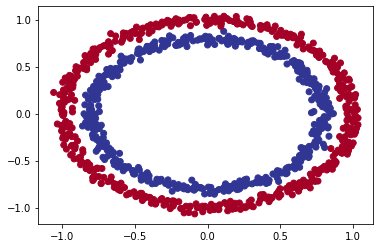

In [17]:
# Visualize with Matplotlib
import matplotlib.pyplot as plt

plt.scatter(circles['X0'],circles['X1'],c=circles['Label'],cmap=plt.cm.RdYlBu)

## Input and Output shapes

In [18]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
# Check how many samples we are working with
len(X),len(y)

(1000, 1000)

In [20]:
# View the first examples
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modeling

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak

In [21]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [22]:
# Let's try and improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy, it is performing guessing. So let's add an extra layer

In [23]:
from re import VERBOSE
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# 3. fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [24]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our Model

In [25]:
# Set random Seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    # tf.keras.Input(shape=(None,2)),
    # tf.keras.layers.Dense(100,activation='relu'),
    # tf.keras.layers.Dense(10,activation = 'relu'),
    # tf.keras.layers.Dense(1,activation='sigmoid')
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. fit the model
model_3.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

To visualize our model's prediction lets create a function. The function will:

* Take in a trained model
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictinos as well as a line between the different zones  ( where each unique class falls)


In [26]:
import numpy as np

def plot_decision_boundary(model,X,y):
  # Plots the decision boundary created by a model predicting X

  # Define the axis boundaries of the plot and create a meshgrid
  X_min,X_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min()-0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min,X_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print('Doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print('Doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 1ms/step
Doing binary classification


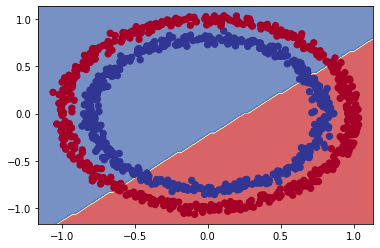

In [27]:
# Check out the predictions our model 
plot_decision_boundary(model=model_3,X=X,y=y)

We compiled our model for binary classification model. But now we want to work for a regression. So let's change the model to suit our data

In [28]:
# Let's se if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y- X+100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our data to regression model
# model_3.fit(X_reg_train,y_reg_train,epochs=100)

In [29]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_4.fit(tf.expand_dims(X_reg_train,axis=1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 9ms/step


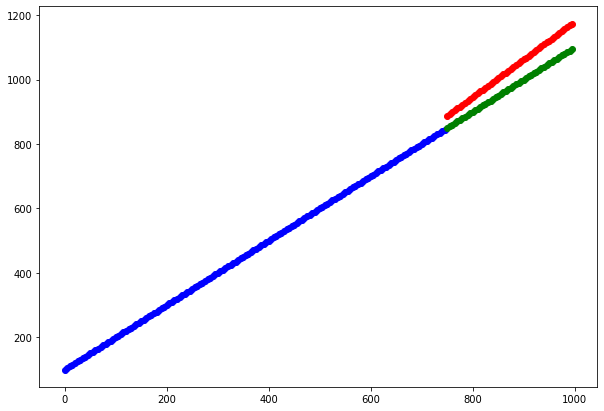

In [30]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c='b',label='training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Test data')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Predictions')


## Missing piece : Non Linearity

In [31]:
# Set Random Seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

# 3. Fit the model
model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

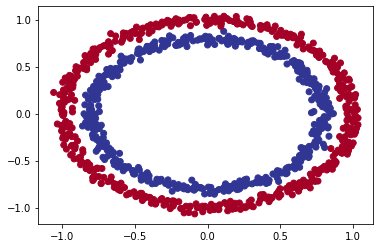

In [32]:
# Check our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


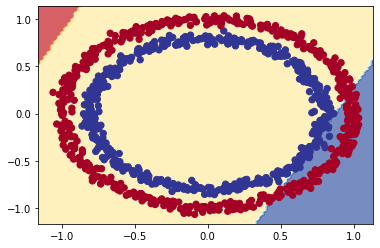

In [33]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_5,X=X,y=y)

Let's try to build a neural network that is not linear

In [34]:
# Set random seed
tf.random.set_seed(42)

# 1.  Create a model with a non-linear activation function
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu')
])

# 2. Compile the model
model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

# 3. Fit the model
model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

In [35]:
# Time to replicate the multi-layers nuearal network from TensorFlow Playground 

# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile
model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [36]:
# Evaluate
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 1ms/step
Doing binary classification


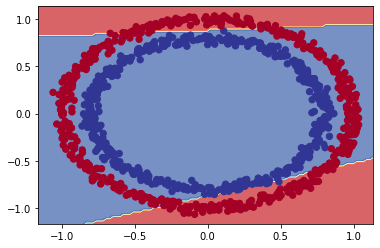

In [37]:
# How do our model predictions look
plot_decision_boundary(model_7,X,y)

In [38]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
history = model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [39]:
# Evaluate the model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


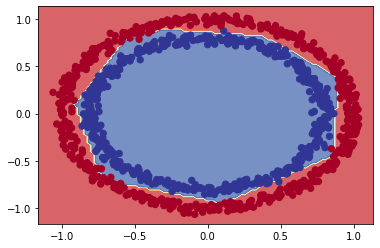

In [40]:
# Visualize
plot_decision_boundary(model_8,X,y)

Let's see the concepts of linear and non linear functions in action

In [41]:
# Create a toy a tensor (similar to the data we pass into our models)
import tensorflow as tf
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

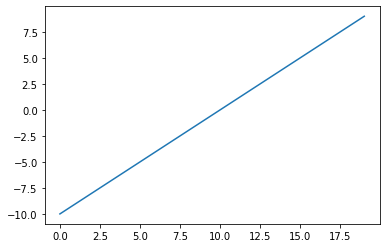

In [42]:
# Visualize our toy tensor
import matplotlib.pyplot as plt
plt.plot(A)

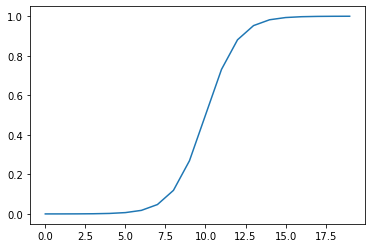

In [43]:
# Let's start by replicating sigmoid = sigmoid(x) = 1/(1+exp(-x))

def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on toy tensor
sigmoid(A)

# Plot the sigmoid toy tensor
plt.plot(sigmoid(A))

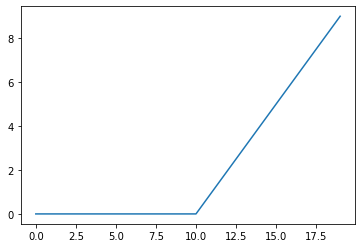

In [44]:
# Let's try to replicate ReLu

def relu(x):
  return tf.maximum(x,0)

# Plot the relu function
plt.plot(relu(A))

In [45]:
# Let's try the liear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

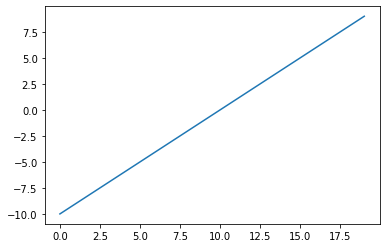

In [46]:
plt.plot(tf.keras.activations.linear(A))

In [47]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

 Let's create a training and test set

In [48]:
# Checking the size of data
len(X)

1000

In [49]:
# Split into train and test sets

X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:],y[800:]

In [50]:
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# 2. Compile the model
model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

# 3. Fit the model
history = model_9.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [52]:
# Evaluate the model
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 1s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


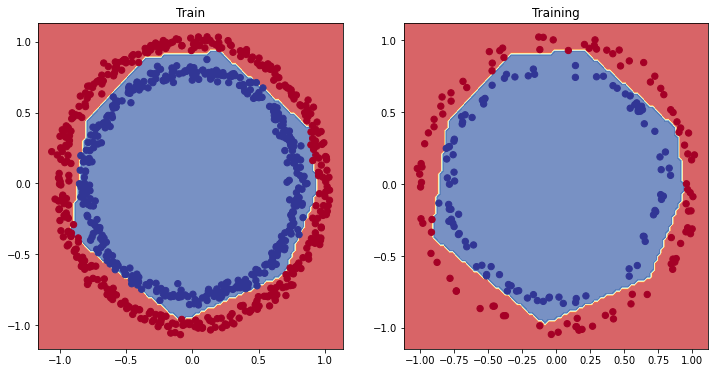

In [53]:
# Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_9,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Training')
plot_decision_boundary(model_9,X_test,y_test)

## Plot the loss curves

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [55]:
import pandas as pd
history_df = pd.DataFrame(history.history)

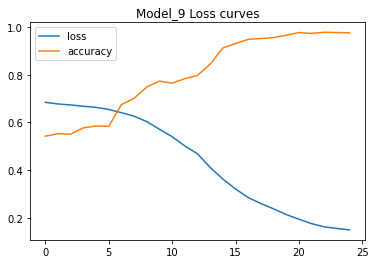

In [56]:
history_df.plot()
plt.title('Model_9 Loss curves');

## Finding the best learning rate

To find the ideal learning rate, we're going to use the following steps;

* A learning rate **callback** - You can think of it as an extra piece of a functionality you can add to your model while training.
* Another model
* A modified loss curves plot.

In [57]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile the model
model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
    )

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

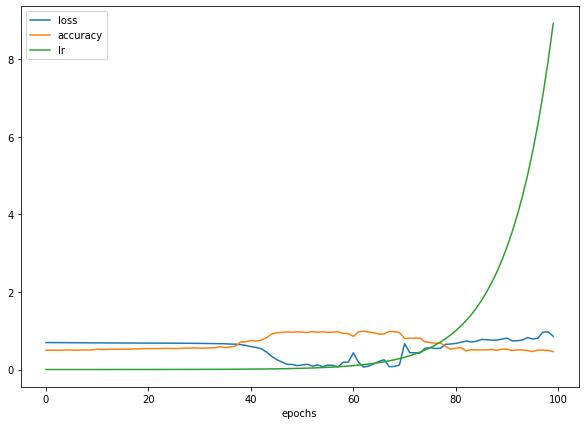

In [58]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel='epochs');

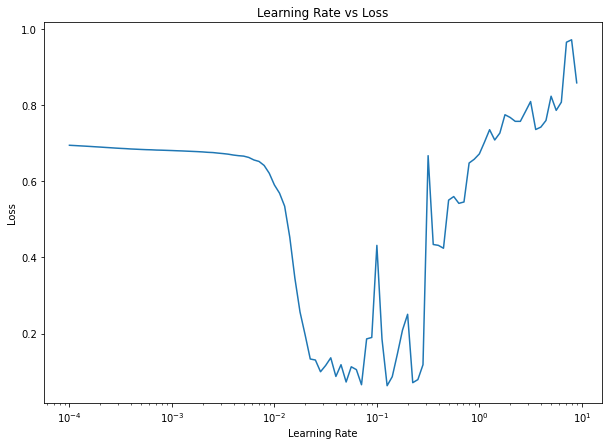

In [59]:
 # Plot the learning rate vs loss
 lrs = 1e-4*(10**(tf.range(100)/20))
 plt.figure(figsize=(10,7))
 plt.semilogx(lrs, history_10.history['loss'])
 plt.xlabel('Learning Rate')
 plt.ylabel('Loss')
 plt.title('Learning Rate vs Loss');

In [60]:
# Example of other typical learning rate values are 
10**0,10**-1,10**-2,10**-3,10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
# Learning rate we used before
10**-2

0.01

In [62]:
from tensorflow.python.eager.monitoring import Metric
# Let's try using a higher *ideal* learning rate with the same model
import tensorflow as tf 

# set random Seed
tf.random.set_seed(42)

# 1. Create a model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile the model
model_11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.02),
    metrics = ['accuracy']
)

# 3. Fit the model
history_11 = model_11.fit(X_train,y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [63]:
# Evaluate the model 11 on test dataset
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.0574018768966198, 0.9900000095367432]

In [64]:
# Evaluate model 9
model_9.evaluate(X_test,y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 2s 5ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


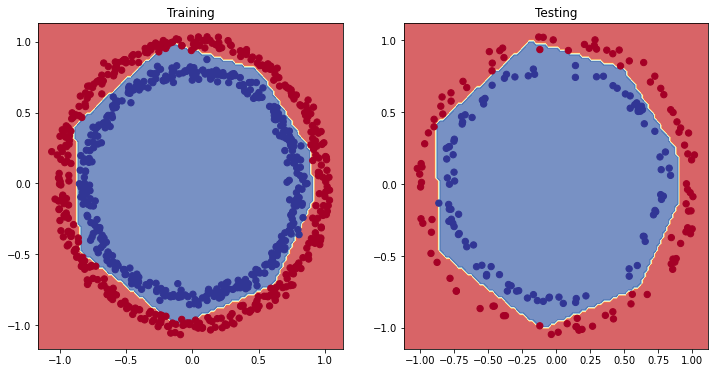

In [66]:
# Plot the decision boundries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_11,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_11,X_test,y_test)

## More classification evaluation methods

Alongside Visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix

In [67]:
# Check the accuracy of our model
loss,accuracy = model_11.evaluate(X_test,y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.0574018768966198
Model accuracy on the test set: 99.00%


Confusion Matrix

In [71]:
# Create a confusion Matrix

from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

7/7 [==============================] - 0s 7ms/step


array([[99,  2],
       [ 0, 99]])

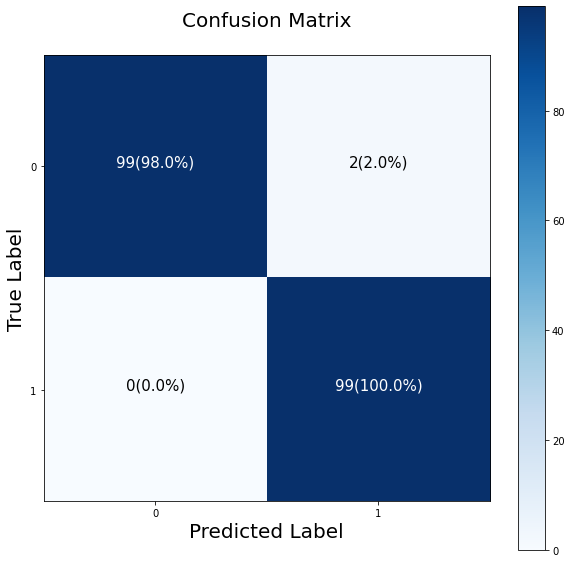

In [82]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize=figsize)
# Create a matrix plot 
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax) 

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels
       )

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
  plt.text(j,i,f'{cm[i,j]}({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]> threshold else 'black',
           size = 15)

# Working with a larger example ( Multiclass Classification )

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_data.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [3]:
train_data[0].shape

(28, 28)

Text(0.5, 1.0, '9')

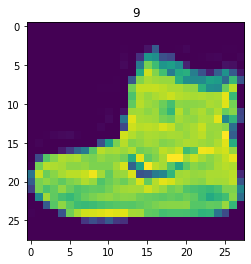

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])
plt.title(train_labels[0])

In [5]:
#Check out sample labels
train_labels[0]

9

In [6]:
# Create a small list so we can index to human readable labels

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'T-shirt/top')

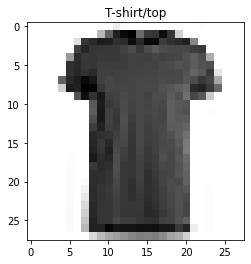

In [7]:
# Plot an example image and it's label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

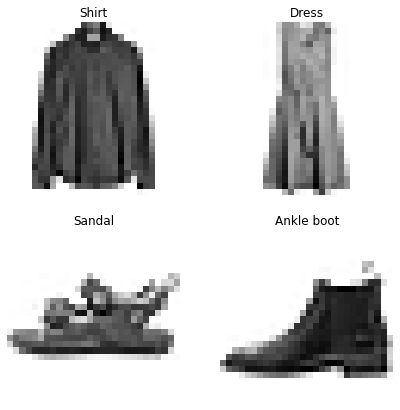

In [8]:
# Plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Building a multi-class classification model
Things to tweak:
* Input Shape = (28,28)
* Output Shape = (10) for 10 classes
* Loss function = SparseCategoricalCrossentropy() - If the labels are integers. If the labels are one_hot encoded, need to use CategoricalCrossEntropy()
* Output layer activation = softmax

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile
model_12.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
non_norm_history = model_12.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [10]:
# Check the model summary
model_12.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Normalize our data

Neaural networks prefer data to be scaled ( or normalized)

In [11]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

In [12]:
# We can get our training and testing data between 0 &b 1 by deviding by the maximum
train_data_norm = train_data/255
test_data_norm = test_data/255

# Check the min and max of scaled training data
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [13]:
from sklearn.utils import validation
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile the model
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# 3. Fit the model
histrory_norm = model_13.fit(train_data_norm,train_labels,epochs=10,
                             validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (between 0&1)

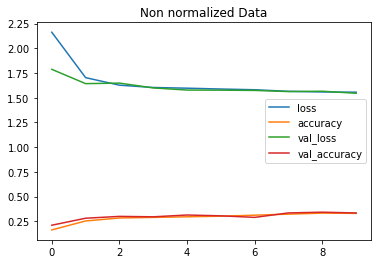

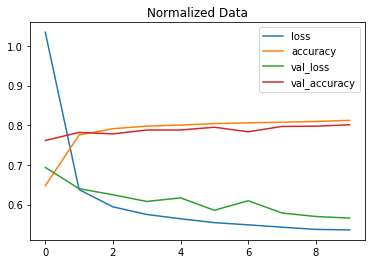

In [15]:
import pandas as pd 

#Plot non - normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non normalized Data')
pd.DataFrame(histrory_norm.history).plot(title = 'Normalized Data')

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile
model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_find_lr = model_14.fit(train_data_norm,
                               train_labels,
                               epochs = 10,
                               validation_data = (test_data_norm,test_labels),
                               callbacks = [lr_scheduler]
                               )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 8

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

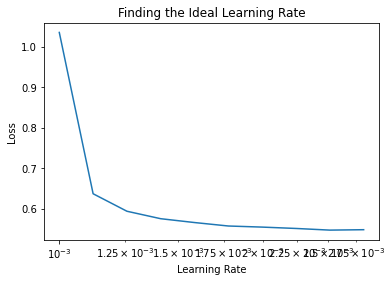

In [22]:
# Plot the Learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(10)/20))
plt.semilogx(lrs,history_find_lr.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the Ideal Learning Rate')

1e-3 seems to be a good learning rate

In [48]:
from sklearn.utils import validation
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile the model
model_15.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

# 3. Fit the model
histrory_norm = model_15.fit(train_data_norm,train_labels,epochs=20,
                             validation_data = (test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification Model

* Evaluate ysing other classification metrics (such as a confusion matrix)
* Asses some if its predictions
* Improve its results ( training for longer or changing the architecture)
* Save and export if for use in an application

In [49]:
# Create a confusion matrix
import itertools

def make_confustion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig,ax = plt.subplots(figsize=figsize)
  # Create a matrix plot 
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax) 

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[0])):
    plt.text(j,i,f'{cm[i,j]}({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]> threshold else 'black',
            size = 15)

In [50]:
# make some predictions with our model
y_probs = model_15.predict(test_data_norm)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01],
       [3.4278653e-06, 1.2899314e-16, 9.5989150e-01, 2.0516393e-07,
        1.5329231e-02, 2.4532665e-13, 2.4142833e-02, 1.1383622e-28,
        6.3272531e-04, 4.4789129e-08],
       [6.1062819e-05, 9.9657661e-01, 4.3866635e-08, 3.3405751e-03,
        1.3249395e-05, 1.4383214e-21, 8.2790129e-06, 7.3236611e-18,
        5.4811181e-08, 4.9224761e-14],
       [7.5031356e-05, 9.9053681e-01, 4.2528447e-07, 9.2231641e-03,
        1.3623103e-04, 1.8276367e-18, 2.6808189e-05, 4.8124370e-14,
        1.4521520e-06, 2.2211375e-11],
       [7.2189979e-02, 1.5495764e-06, 2.5566906e-01, 1.0363132e-02,
        4.3541368e-02, 1.1069343e-13, 6.1693007e-01, 6.7543116e-23,
        1.3049184e-03, 1.2140288e-09]], dtype=float32)

In [51]:
y_probs[0], tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0])]

(array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
        5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
        4.0605268e-03, 8.0787349e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [57]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [59]:
test_labels.shape , y_preds.shape

((10000,), (10000,))

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

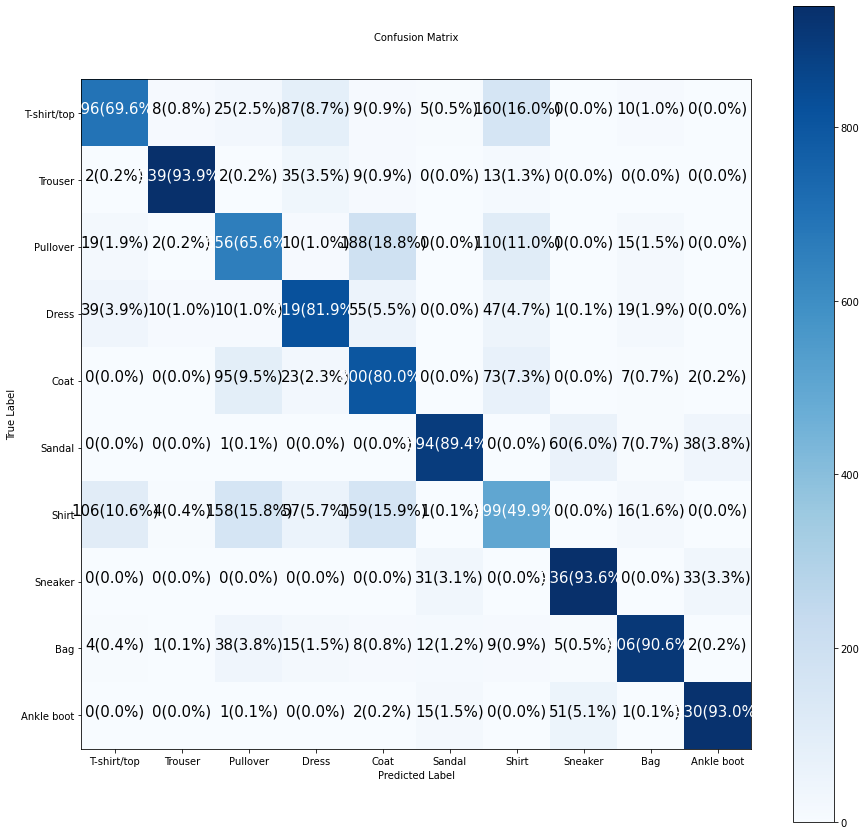

In [62]:
# Make a prettier confusion Matrix
make_confustion_matrix(test_labels,y_preds,
                       classes=class_names,
                       figsize=(15,15),
                       text_size = 10)

> 🔑 **Note** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of data and the inputs and outputs of your models. 

How about we create a function for 
* Plot a random image
* Make a prediction on said image
* Label the plot with true label & Predicted label

In [66]:
import random

def plot_random_image(model,images,true_labels,classes):
  '''
  Picks a random image, plots it and labels it with a prediction and true label.
  '''

  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (predictino/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

1/1 [==============================] - 0s 18ms/step


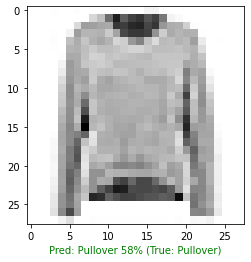

In [74]:
plot_random_image(model=model_15,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our modle learning?

In [75]:
# Find the layers of our most recent model
model_15.layers

In [77]:
# Extract a particular layer
model_15.layers[1]

In [78]:
# Find the patterns of a layer
weights, biases = model_15.layers[1].get_weights()

# Shapes
weights,weights.shape

(array([[ 0.71502626, -0.06077098, -0.9976306 , -1.0484313 ],
        [ 0.2773213 , -0.47155428, -0.5291645 ,  0.0232926 ],
        [ 0.7752429 ,  0.5402763 , -1.128857  , -0.7426155 ],
        ...,
        [-0.3945344 ,  0.476287  , -0.22641571,  0.25505948],
        [-0.40515783,  0.618101  ,  0.23928401, -0.5038762 ],
        [ 0.23884569,  0.11606903, -0.12131351,  0.04352415]],
       dtype=float32), (784, 4))

In [79]:
biases,biases.shape

(array([ 2.4485759e-02, -6.1474519e-04, -2.7230185e-01,  8.1124872e-01],
       dtype=float32), (4,))

In [80]:
model_15.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


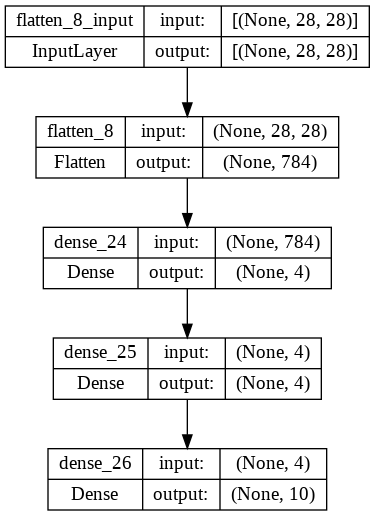

In [84]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inpuuts and outputs of each layer
plot_model(model_15,show_shapes=True)